# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

> In order to understand what the data looks like and to have a first impression on what features would possibly contribute to an effective prediction of sales. For example, in the data for this activity, it can be seen that there are continuous and categorical variables which can be combined to provide an estimate of sales.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

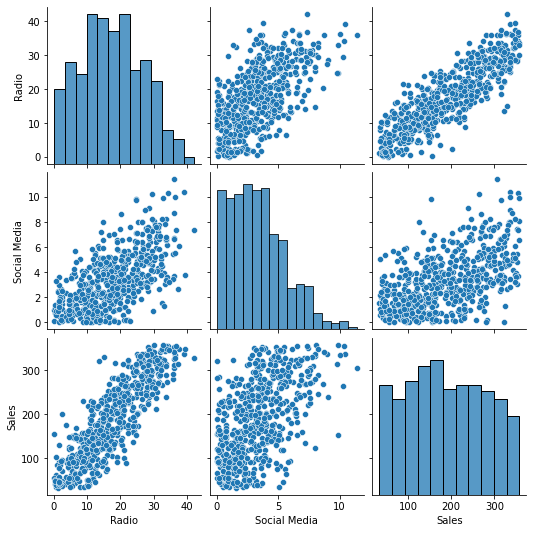

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data=data);

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



> Looking at the plot, it shows that `Radio` has a linear relationship with `Sales`. It can also be seen that `Social Media` has a somewhat linear relationship with `Sales` but it is not that pronounced as compared with the relationship between `Radio` and `Sales`. Another observation here that must be noted is that there is a somewhat linear relationship as well between the two independent variables, `Radio` and `Social Media`, which suggests that there's a little bit of collinearity between that must be accounted for in the model later. As for the variables that are excluded from the plot, it can be seen that both `TV` and `Influencer` are missing, primarily because these two variables are categorical rather than continuous.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 
print(data.groupby("TV")["Sales"].mean())
print()

# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 
print(data.groupby("Influencer")["Sales"].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



> Yes, they are useful predictors for `Sales`. In particular, for the `TV` variable, it shows that there is a significant increase in `Sales` if the `TV` promotion budget is `High`. As for the `Influencer` variable, it can be seen that the mean `Sales` is somewhat uniform across the different categories which shows that the variable has a probably lesser effect on `Sales` as compared to the effect of `TV`.  

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data.dropna(axis=0, inplace=True)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 
print(f"Old columns: {data.columns}")

data.columns = ['TV', 'Radio', 'SocialMedia', 'Influencer', 'Sales']

print(f"New columns: {data.columns}")

Old columns: Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')
New columns: Index(['TV', 'Radio', 'SocialMedia', 'Influencer', 'Sales'], dtype='object')


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [7]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = "Sales ~ C(TV) + Radio + SocialMedia + C(Influencer)"

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(data=data, formula=ols_formula)

# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
model_results = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.82e-282
Time:                        01:06:55   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
SocialMedia               -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



> I tried using all variables (`TV`, `Radio`, `Social Media`, and `Influencer`) since I wanted to check right away what would be the effect of all these variables to the model.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

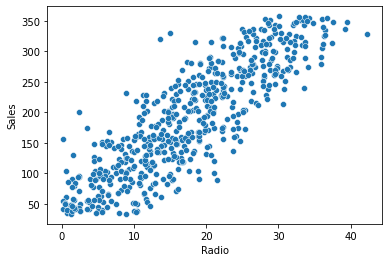

In [8]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 
sns.scatterplot(data=data, x='Radio', y='Sales');

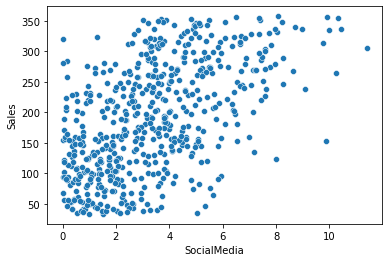

In [9]:
sns.scatterplot(data=data, x='SocialMedia', y='Sales');

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


> It is clear that the linearity assumption is met by looking at the scatter plot for `Radio` vs. `Sales`. However, for the scatter plot between `Social Media` and `Sales`, a linearity might be discerned but it is not as strong as that of the previous relationship.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

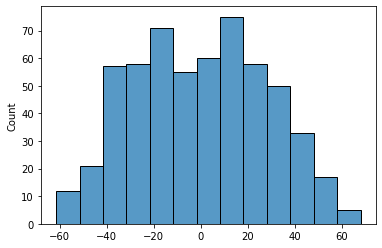

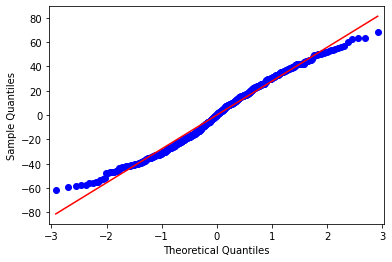

In [10]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
sns.histplot(data=residuals);

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
sm.qqplot(residuals, line = 's');

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



> Yes. By looking at the histogram alone, it can be discerned that the residuals are normally distributed; hence, the normality assumption is met. As a complement, when the Q-Q plot is created, it can be seen that the quantiles of the residuals fall almost along the diagonal line, with the exception at the extremeties of the line.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

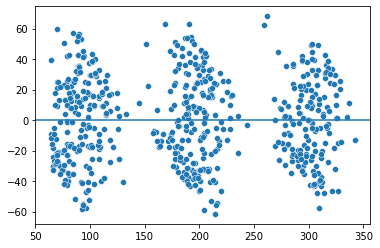

In [11]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
sns.scatterplot(x=model.predict(data[['TV', 'Radio', 'SocialMedia', 'Influencer']]), y=residuals).axhline(0);
# alternative to x: x=model.fittedvalues

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




> It can be seen that the data points fall on three groups because of the dominance of the TV categorical data (three groups for the three categories of `TV`). However, if the points are looked upon with respect to the $y=0$ line, the points have constant variance, so the assumption is met regardless of the categories that are present.  

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

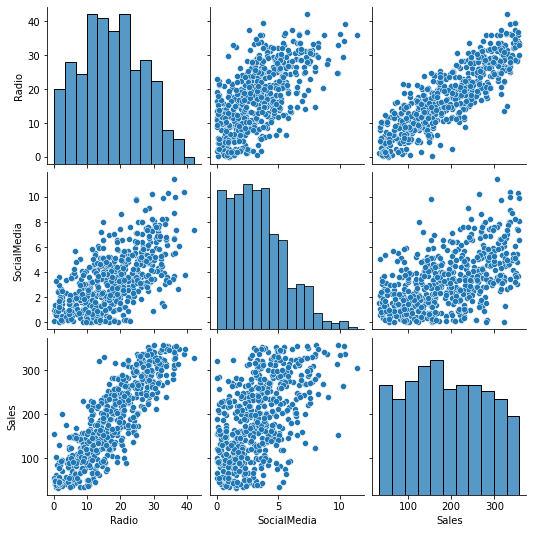

In [12]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data=data);

In [13]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Radio','SocialMedia']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
Radio,5.170922
SocialMedia,5.170922


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?

> Based on the scatter plot between `Radio` and `SocialMedia`, as well as the VIF value, there is a collinearity between the two variables (a VIF of 5.17 indicates high collinearity since it's greater than 5). It is suggested for the model to use only one of the two variables, or perhaps perform feature engineering to merge the two variables as one.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [14]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.82e-282
Time:                        01:06:55   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
SocialMedia               -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


> The model's R-squared value is quite high, 0.904, which suggests that the model is "good." However, we must be cautious on this since having more variables in the model inevitably increases the R-squared value. In this regard, the high R-squared value of the model is due to the presence of more variables, but does not indicate that the model really provides a good prediction for `Sales`.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [15]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.82e-282
Time:                        01:06:55   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
SocialMedia               -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



> The model coefficients are: <br> $\beta_0 = 217.4784$ <br> $\beta_{TV\_Low} = -154.5736$ <br> $\beta_{TV\_Medium} = -75.5947$ <br> $\beta_{Influencer\_Mega} = 2.4948$ <br> $\beta_{Influencer\_Micro} = 2.9391$ <br> $\beta_{Influencer\_Nano} = 0.8015$ <br> $\beta_{Radio} = 2.9735$ <br> $\beta_{SocialMedia} = -0.1391$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



> $$
\begin{align*}
    Sales &= \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 \\
    \Rightarrow Sales &= \beta_0 + \beta_{TV\_Low}X_{TV\_Low} + \beta_{TV\_Medium}X_{TV\_Medium} + \beta_{Influencer\_Mega}X_{Influencer\_Mega} + \beta_{Influencer\_Micro}X_{Influencer\_Micro} + \beta_{Influencer\_Nano}X_{Influencer\_Nano} + \beta_{Radio}X_{Radio} + \beta_{SocialMedia}X_{SocialMedia}
\end{align*}
$$

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



Looking upon the coefficient estimates, there are those that positively influence the model while there are those that negatively influence the model. With regards to being statistically significant, not all coefficient estimates are statistically significant. Looking at the generated model results, those with a high P value are not statistically significant (that is, we cannot conclude that the explanatory variable affects the dependent variable). Specifically, these coefficient estimates are not statistically significant: $\beta_{Influencer\_Mega}$, $\beta_{Influencer\_Micro}$, $\beta_{Influencer\_Nano}$, and $\beta_{SocialMedia}$.

**Question:** Why is it important to interpret the beta coefficients?



It is important to interpret beta coefficients since they directly influence the model.

**Question:** What are you interested in exploring based on your model?



I am interested in what would happen to the model of the other beta coefficients are removed.

**Question:** Do you think your model could be improved? Why or why not? How?

Yes, it can be further improved by removing the beta coefficients that do not significantly contribute to the predictive capacity of the model.

## Conclusion

**What are the key takeaways from this lab?**

It is very easy to perform multiple linear regression using Python.

**What results can be presented from this lab?**

It can be said that not all variables significantly affect the model. Specifically, the effect of Social Media and Influencers can be disregarded from the model.

**How would you frame your findings to external stakeholders?**

Based from the model, the effect of influencers and social media are not statistically significant; therefore, it is recommended to reduce the budget towards marketting activities geared towards the use of influencers and social media. Marketting budget can instead be redirected to TV and radio promotion. 

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.